#OOP2 Homework 4
###Anishka Chaudhari (ac2293)
###RUID - 212003779

**Q.1**

Write a decorator to compare the time taken to compute Fibonacci(35) by the following 3 functions:
(1)  recursive Fibonacci with no memoization
(2)  recursive Fibonacci with memoization
(3)  Fibonacci via a generator


In [11]:
import time

def time_recurr(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Time taken by {func.__name__}: {end_time - start_time:.5f} seconds")
        return result
    return wrapper

@time_recurr
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

@time_recurr
def fib_memoize(n, memo={0: 0, 1: 1}):
    if n in memo:
        return memo[n]
    memo[n] = fib_memoize(n-1, memo) + fib_memoize(n-2, memo)
    return memo[n]

@time_recurr
def fib_gen(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

fib_recursive(5)
fib_memoize(5)
fib_gen(5)


Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00259 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00375 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00119 seconds
Time taken by fib_recursive: 0.00693 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00003 seconds
Time taken by fib_recursive: 0.00000 seconds
Time taken by fib_recursive: 0.00007 seconds
Time taken by fib_recursive: 0.00704 seconds
Time taken by fib_memoize: 0.00000 seconds
Time taken by fib_memoize: 0.00000 seconds
Time taken by fib_memoize: 0.00282 seconds
Time taken by fib_memoize: 0.00000 seconds
Time taken by fib_memoize: 0.00286 seconds
Time taken by fib_memoize: 0.00000 seconds
Time taken by fib_memoize: 0.00289 seconds
Time taken by fib_memoiz

<generator object fib_gen at 0x7f1264e18190>

**Q.2**

You are working on a project to create a basic student management system for a school. You are tasked with creating a SQLite3 database using Python to store and manage student records. The database should have the following functionalities:
(1)  Create a table named "students" with the following columns: student_id (integer), first_name (text), 
       last_name (text), age (integer), and grade (text).
(2)  Write a Python function that adds a new student record to the "students" table with the given inputs: 
       first name, last name, age, and grade.
(3)  Write a Python function that retrieves all the student records from the "students" table and displays
       them in a formatted manner.
(4)  Write a Python function that allows the user to search for a student record by their student ID 
       and displays the record if found.
(5)  Write a Python function that allows the user to update the age of a student by their student ID.
(6)  Write a Python function that allows the user to delete a student record by their student ID.

Your task is to implement the above functionalities using SQLite3 and Python. Include appropriate error handling and make sure to close the database connection after each operation.

Start with inserting the following 5 students into the "students" table:
First Name       Last Name       Age       Grade
===================================================
John             Doe             18        Grade 12
Jonathan         Cole            16        Grade 10
Jane             Smith           17        Grade 11
Elisabeth        Shue            17        Grade 11
David            Lee             16        Grade 10

Note: You can assume that the student_id column is unique and auto-incrementing


In [2]:
import sqlite3

# Create a connection to the database
conn = sqlite3.connect('students.sqlite')

cur = conn.cursor()
cur.execute('DROP TABLE IF EXISTS students')
cur.execute('CREATE TABLE IF NOT EXISTS students (student_id INTEGER PRIMARY KEY, first_name TEXT, last_name TEXT, age INTEGER, grade TEXT)')

cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', ('John', 'Doe', 18, '12'))
cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', ('Jonathan', 'Cole', 16, '10'))
cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', ('Jane', 'Smith', 17, '11'))
cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', ('Elisabeth', 'Shue', 17, '11'))
cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', ('David', 'Lee', 16, '10'))

conn.commit()
conn.close()

def add_student(first_name, last_name, age, grade):
    conn = sqlite3.connect('students.sqlite')
    cur = conn.cursor()    
    cur.execute('INSERT INTO students (first_name, last_name, age, grade) VALUES (?, ?, ?, ?)', (first_name, last_name, age, grade))
    conn.commit()
    conn.close()

def get_all_students():
    conn = sqlite3.connect('students.sqlite')
    cur = conn.cursor()   
    cur.execute('SELECT * FROM students')
    students = cur.fetchall()
    conn.close()    
    return students

def search_student(student_id):
    conn = sqlite3.connect('students.sqlite')
    cur = conn.cursor()    
    cur.execute('SELECT * FROM students WHERE student_id = ?', (student_id,))
    student = cur.fetchone()    
    conn.close()    
    return student

def update_student_age(student_id, age):
    conn = sqlite3.connect('students.sqlite')
    cur = conn.cursor()    
    cur.execute('UPDATE students SET age = ? WHERE student_id = ?', (age, student_id))
    conn.commit()    
    conn.close()

def delete_student(student_id):
    conn = sqlite3.connect('students.sqlite')
    cur = conn.cursor()    
    cur.execute('DELETE FROM students WHERE student_id = ?', (student_id,))
    conn.commit()    
    conn.close()

add_student("Pichi", "Hookesh", 2, 12)
print(search_student(1))
students = get_all_students()
print(students)

(1, 'John', 'Doe', 18, '12')
[(1, 'John', 'Doe', 18, '12'), (2, 'Jonathan', 'Cole', 16, '10'), (3, 'Jane', 'Smith', 17, '11'), (4, 'Elisabeth', 'Shue', 17, '11'), (5, 'David', 'Lee', 16, '10'), (6, 'Pichi', 'Hookesh', 2, '12')]


**Q.3**

Write a string reverser using a generator in Python.  For the input string
     Roger Federer: GOAT
the output is   
     TAOG :reredeF regoR


In [21]:
def reverse_string(string):
    for char in reversed(string):
        yield char

input_string = "Roger Federer: GOAT"
output_string = "".join(reverse_string(input_string))
print(output_string)


TAOG :reredeF regoR


**Q.4**    
Stack Implementations
(1) Using inheritance (is-a relationship), implement your own stack class by extending the built-in list.
(2) Using composition (has-a relationship), implement your own stack class by creating a list as 
      an attribute (or a data member/field).


In [19]:
# Q4)1)

class Stack(list):
    push = list.append

    def is_empty(self):
        return not bool(self)

    def peek(self):
        return self[-1] if self else None

# Q4)2)

class Stack:
    def __init__(self):
        self.items = [(random.randint(0, 100) for _ in range(5))]

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def is_empty(self):
        return not bool(self.items)

    def peek(self):
        return self.items[-1] if self.items else None

**Q.5**

You are given a list of integers. Write a Python program that generates a new list of integers using a generator function. The generator should only include even numbers from the original list, and each even number should be squared.
Example input:      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Example output:    [4, 16, 36, 64, 100]


In [20]:
def even_squares(numbers):
    for num in numbers:
        if num % 2 == 0:
            yield num ** 2

input_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
output_list = list(even_squares(input_list))
print(output_list)


[4, 16, 36, 64, 100]


**Q.6** 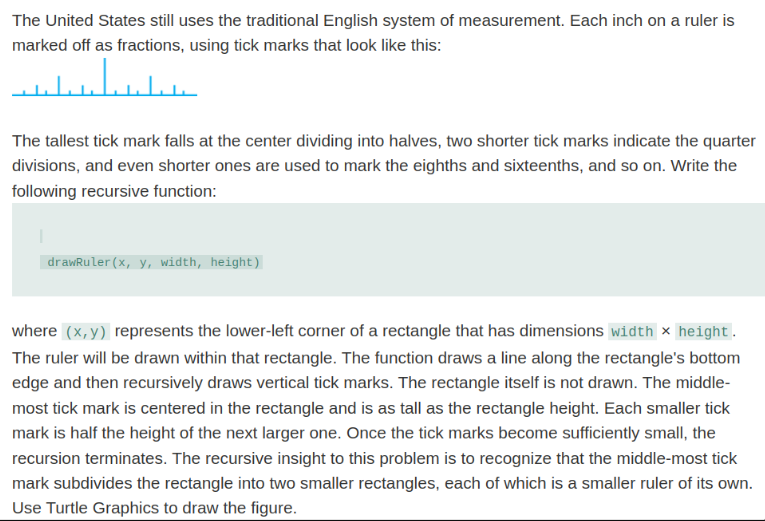

In [ ]:
!pip3 install ColabTurtle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ColabTurtle.Turtle as t

def drawRuler(x, y, width, height):
    if height < 10:
        return
    t.penup()
    t.goto(x, y)
    t.pendown()
    t.forward(width)
    t.backward(width / 2)
    t.left(90)
    t.forward(height)
    t.backward(height)
    t.right(90)
    drawRuler(x, y, width / 2, height / 2)
    drawRuler(x + width / 2, y, width / 2, height / 2)


def main():
    t.speed(5)
    t.pensize(2)
    turtle.pencolor("skyblue")
    drawRuler(20,50, 400, 100)
    t.hideturtle()
    # turtle.done()


main()